# README
This notebook is used to split the dataset.

In [3]:
import numpy as np
import pickle
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from batteryml.data.battery_data import BatteryData
random.seed(2024)
np.random.seed(2024)

# Tongji dataset

In [4]:
# Here is the train_ids provided by BatteryML
data_path = '../dataset/Tongji'
tmp_files = os.listdir(data_path)
files = []
for file_name in tmp_files:
    # if file_name.startswith('Tongji3'):
    #     continue
    data = pickle.load(open(f'../dataset/Tongji/{file_name}', 'rb'))
    nominal_capacity = data['nominal_capacity_in_Ah']
    cycle_data = data['cycle_data'] # list of cycle data dict
    last_cycle = cycle_data[-1]
    last_cycle_soh = max(last_cycle['discharge_capacity_in_Ah']) / nominal_capacity
    if last_cycle_soh < 0.825:
        files.append(file_name)
    else:
        print(f'{file_name} has not reached end of life | Final SOH is {last_cycle_soh}')

test_ratio = 0.2
testing_set = random.sample(files, int(len(files)*test_ratio))
training_set = [i for i in files if i not in testing_set]

val_ratio = 0.2

validation_set= random.sample(training_set, int(len(training_set)*0.25))
training_set = [i for i in training_set if i not in validation_set]

# NCM_NCA_cells_tongji3 = ['Tongji3_CY25-05_1-#1.pkl', 'Tongji3_CY25-05_1-#2.pkl', 'Tongji3_CY25-05_1-#3.pkl',
#                          'Tongji3_CY25-05_2-#1.pkl', 'Tongji3_CY25-05_2-#2.pkl', 'Tongji3_CY25-05_2-#3.pkl',
#                          'Tongji3_CY25-05_4-#1.pkl', 'Tongji3_CY25-05_4-#2.pkl', 'Tongji3_CY25-05_4-#3.pkl']
testing_set = testing_set
assert len(training_set) + len(testing_set) + len(validation_set) == len(files)
print(f'training_set: {len(training_set)} {training_set}')
print(f'Val set: {len(validation_set)} {validation_set}')
print(f'Test set: {len(testing_set)} {testing_set}')

Tongji2_CY25-05_1-#20.pkl has not reached end of life | Final SOH is 0.8418371190036342
Tongji1_CY25-05_1-#8.pkl has not reached end of life | Final SOH is 0.8600628290492472
Tongji2_CY25-05_1-#3.pkl has not reached end of life | Final SOH is 0.8352396070870532
Tongji1_CY45-05_1-#3.pkl has not reached end of life | Final SOH is 0.8581891127330187
Tongji2_CY25-05_1-#7.pkl has not reached end of life | Final SOH is 0.8339902266568623
Tongji1_CY25-05_1-#9.pkl has not reached end of life | Final SOH is 0.8599803473391393
Tongji2_CY25-05_1-#19.pkl has not reached end of life | Final SOH is 0.8429829901780671
Tongji2_CY45-05_1-#3.pkl has not reached end of life | Final SOH is 0.852239540721028
Tongji2_CY25-05_1-#4.pkl has not reached end of life | Final SOH is 0.8338608111929571
Tongji1_CY45-05_1-#4.pkl has not reached end of life | Final SOH is 0.8470183728152513
Tongji2_CY25-05_1-#23.pkl has not reached end of life | Final SOH is 0.8492928569781595
Tongji2_CY25-05_1-#21.pkl has not reached

# Data check

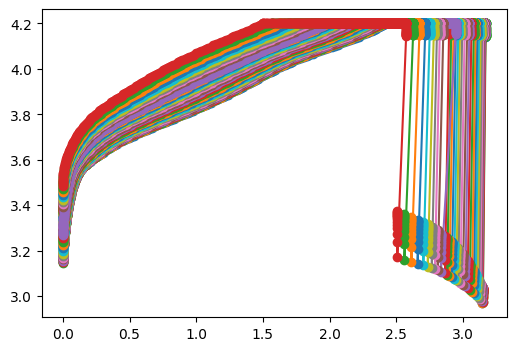

In [5]:
data = pickle.load(open('../dataset/Tongji/Tongji1_CY25-1_1-#1.pkl', 'rb'))
cycle_data = data['cycle_data']
nominal_capacity = data['nominal_capacity_in_Ah']
need_keys = ['current_in_A', 'voltage_in_V', 'charge_capacity_in_Ah', 'discharge_capacity_in_Ah', 'time_in_s']
fig = plt.figure(figsize=(6,4))
for correct_cycle_index, sub_cycle_data in enumerate(cycle_data):
    cycle_df = pd.DataFrame()
    for key in need_keys:
        cycle_df[key] = sub_cycle_data[key]    
    cycle_df['cycle_number'] = correct_cycle_index + 1
    cycle_df['cycle_number'] = correct_cycle_index + 1
    cycle_df.loc[cycle_df['charge_capacity_in_Ah']<0] = np.nan
    cycle_df.bfill(inplace=True) # deal with NaN
    
    cycle_df = cycle_df.loc[cycle_df['current_in_A']>=0]
    voltage_records = cycle_df['voltage_in_V'].values
    current_records = cycle_df['current_in_A'].values
    charge_capacity_records = cycle_df['charge_capacity_in_Ah'].values
    discharge_capacity_records = cycle_df['discharge_capacity_in_Ah'].values
    capacity_in_battery = np.where(np.logical_and(current_records>=-(nominal_capacity*0.01), discharge_capacity_records<=nominal_capacity*0.01), charge_capacity_records, discharge_capacity_records)
    plt.plot(capacity_in_battery, voltage_records, marker='o')

plt.show()